In [1]:
using Distributions
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
struct WhiteNoise
    μ::Float64
    σ::Float64
    data::Vector{Float64}
end

function WhiteNoise(μ, σ, N)
    d = Normal(μ, σ)
    data = rand(d, N)
    WhiteNoise(μ, σ, data)
end

function E(self::WhiteNoise, N)
    L = length(self.data)
    if N > L; N = L; end
    data = self.data[1:N]
    avg = sum(data)/N
end

E (generic function with 1 method)

In [3]:
function main()
    N = 1000
    μ = 0.
    Σ = [1., 2.5, 5., 10.]
    wn = [WhiteNoise(μ, σ, N) for σ in Σ]
    wave_plots = plot(xlabel="N", ylabel="Amp.", xlims=(0, N))
    [plot!(wave_plots, (1:N, w.data), label="μ=$μ, σ = $(w.σ)") for w in wn]
    
    avg_plots = plot(xlabel="N", ylabel="μ", xlims=(0, N))
    for w in wn
        y = [E(w, n) for n in 1:N]
        plot!(avg_plots, (1:N, y), label="μ=$μ, σ = $(w.σ)")
    end
    
    plot(wave_plots, avg_plots, size=(800, 400))
end
        

main (generic function with 1 method)

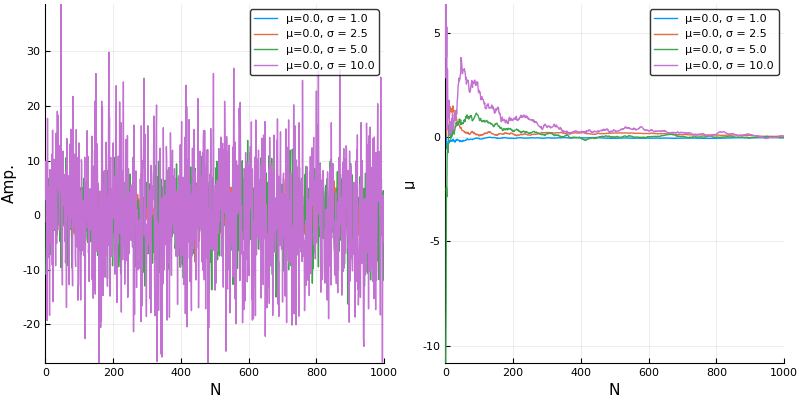

In [4]:
main()